#### 학습목표
- 기울기 (w)
- 절편 (b)
- 회귀 평가 방법
- 피처, 타겟의 스케일링
- 캐글데이터를 활용한 실습

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# 기울기

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

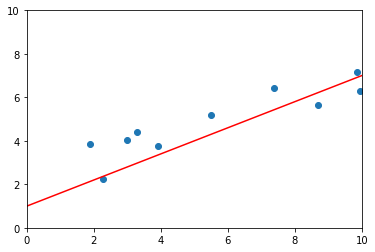

In [4]:
# 경사하강법으로 최적화된 결과값이 도출됨
# f(x) = w*x + b -->cost(w,b)


w = 0.6
b = 1

plt.figure()
plt.scatter(X,Y)
plt.plot([0,10], [b, 10*w + b], c='red')

plt.xlim(0,10)
plt.ylim(0,10)

plt.show()
plt.close()

In [5]:
# w * x.T + b
def prediction(a, b, x):
    result = x*a.T + b
    return result

In [6]:
def update_ab(a, b, x, error, Ir):
    a_delta = -(Ir * (2/len(error)) * (np.dot(x.T, error)) )
    b_delta = -(Ir * (2/len(error)) * np.sum(error) )
    return a_delta , b_delta

In [7]:
def gradient_descent(x, y, iters):
    a = np.zeros((1,1))
    b = np.zeros((1,1))
    
    for idx in range(iters):
        error = y - prediction(a, b, x)
        a_delta, b_delta = update_ab(a, b, x, error, Ir=learning_rate)
        a -= a_delta
        b -= b_delta
    return a, b

In [8]:
def plotting_graph(x, y, a, b):
    y_pred = a[0,0] * x + b
    
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, y_pred, c='green')
    
    
    
    plt.show()
    plt.close()

weight :  [[3.30240912]] bias : [[1.28675786]]


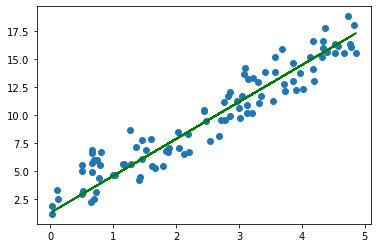

In [9]:
learning_rate = 0.005 

x = 5*np.random.rand(100, 1)
y = 3*x + 5*np.random.rand(100, 1)
w, b = gradient_descent(x, y, iters=100)

print('weight : ', w, 'bias :' , b)

plotting_graph(x, y, w, b)

In [10]:
# 회귀 평가 지표
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
#데이터, 타겟을 프레임으로 만들고 타겟의 값을 target_names 으로 변경하는 최종 프레임 생성

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
featureDF = pd.DataFrame(data = iris.data, columns=iris.feature_names)
targetDF = pd.DataFrame(data=iris.target, columns =['species'])

In [14]:
featureDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
targetDF

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [16]:
# apply 함수
def converter(species):
    if species ==0:
        return 'setosa'
    elif species ==1:
        return 'versicolor'
    elif species ==2:
        return 'virginica'

In [17]:
targetDF['species'] = targetDF['species'].apply(converter)
targetDF

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [18]:
irisDF = pd.concat([featureDF, targetDF] , axis=1)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


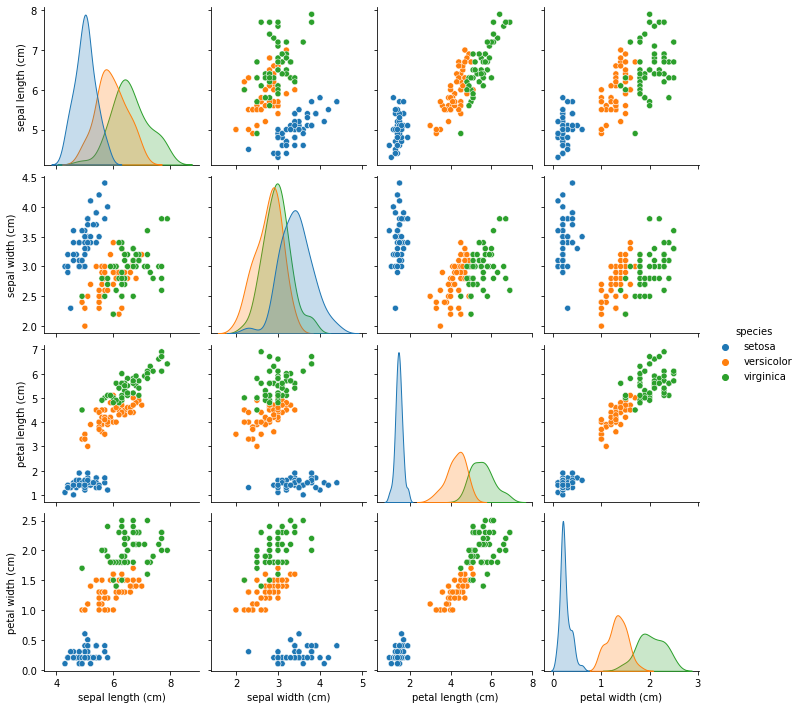

In [19]:
sns.pairplot(irisDF, hue='species')

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
irisDF.drop('species', axis=1, inplace=True)

In [25]:
targetDF = pd.DataFrame(data = iris.target, columns=['species'])
irisDF = pd.concat([irisDF, targetDF], axis = 1)

In [26]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
# feature
X = irisDF.drop('sepal length (cm)', axis=1)
# target
Y = irisDF['sepal length (cm)']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)) ) # rmse는 함수가 없기 떄문에 sqrt 함수를 이용해서 푼다.
print('결정계수 : ', lr_model.score(X, Y))


mae :  0.28904248687779993
mse :  0.12227797110201445
rmse :  0.3496826720070848
결정계수 :  0.8587106939330676


mae, mse, rmse 가 0에 가까울 수록 좋다.
현재 85 % 의 결정력을 가짐.

In [44]:
irisDF.loc[2]

sepal length (cm)    4.7
sepal width (cm)     3.2
petal length (cm)    1.3
petal width (cm)     0.2
species              0.0
Name: 2, dtype: float64

In [43]:
y_pred[2]

7.141292738213212

mae, mse, rmse 등의 수치를 낮추기 위해 feature, target 등의 scaling이 필요한 것이다.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

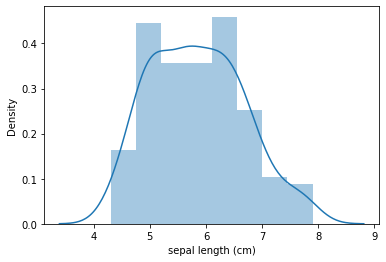

In [45]:
sns.distplot(Y)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

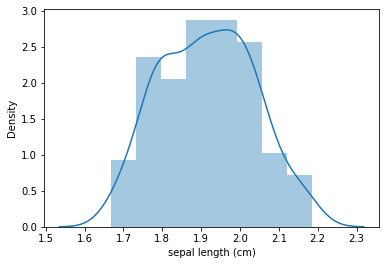

In [47]:
# 타겟은 로그변환을 통한 스케일링 작업이 필요하다. (보편적으로)
logY = np.log1p(Y)
sns.distplot(logY)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, logY, test_size=0.2, random_state=100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)) ) # rmse는 함수가 없기 떄문에 sqrt 함수를 이용해서 푼다.
print('결정계수 : ', lr_model.score(X, logY))


mae :  0.039778668054586845
mse :  0.0022196391045392156
rmse :  0.04711304601211023
결정계수 :  0.8636380066281042


따라서, feature scaling을 해보자

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [67]:
def feature_scaling(method='None' , input_data=None):
    
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    
    if method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    
    return scaled_data

In [71]:
scalX_minmax = feature_scaling(method='MinMax', input_data=X)
scalX_minmax

array([[0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.66666667, 0.06779661, 0.04166667, 0.        ],
       [0.79166667, 0.11864407, 0.125     , 0.        ],
       [0.58333333, 0.06779661, 0.08333333, 0.        ],
       [0.58333333, 0.08474576, 0.04166667, 0.        ],
       [0.375     , 0.06779661, 0.04166667, 0.        ],
       [0.45833333, 0.08474576, 0.        , 0.        ],
       [0.70833333, 0.08474576, 0.04166667, 0.        ],
       [0.58333333, 0.10169492, 0.04166667, 0.        ],
       [0.41666667, 0.06779661, 0.        , 0.        ],
       [0.41666667, 0.01694915, 0.        , 0.        ],
       [0.83333333, 0.03389831, 0.04166667, 0.        ],
       [1.        , 0.08474576, 0.125     , 0.        ],
       [0.79166667, 0.05084746, 0.125     , 0.        ],
       [0.625     , 0.06779661,

In [72]:

X_train, X_test, y_train, y_test = train_test_split(scalX_minmax, logY, test_size=0.2, random_state=100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)) ) # rmse는 함수가 없기 떄문에 sqrt 함수를 이용해서 푼다.
print('결정계수 : ', lr_model.score(scalX_minmax, logY))

mae :  0.03977866805458697
mse :  0.0022196391045392273
rmse :  0.04711304601211035
결정계수 :  0.863638006628104


In [73]:
scalX_standard = feature_scaling(method='Standard', input_data=X)

X_train, X_test, y_train, y_test = train_test_split(scalX_standard, logY, test_size=0.2, random_state=100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)) ) # rmse는 함수가 없기 떄문에 sqrt 함수를 이용해서 푼다.
print('결정계수 : ', lr_model.score(scalX_standard, logY))

mae :  0.03977866805458687
mse :  0.002219639104539217
rmse :  0.04711304601211024
결정계수 :  0.8636380066281042
